<a href="https://colab.research.google.com/github/Brayan8Ch/challenge1-data-science-latam_alura/blob/master/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargamos los datos
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregamos y colocamos la columna 'tienda' al principio
for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], start=1):
    df.insert(0, "Tienda", i)

# Concatenamos
df_stores = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df_stores # En ese df están concatenadas todas las tiendas y ordenadas en base a su tienda.

,Tienda,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,1,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,1,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,1,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,1,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,4,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
9431,4,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980
9432,4,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
9433,4,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250


#1. Análisis de facturación



In [2]:
# Hallamos el total de facturaciones según cada tienda.
df_facturacion = df_stores.groupby('Tienda')['Precio'].sum().reset_index(name='Facturacion Total')
df_facturacion

,Tienda,Facturacion Total
0,1,1.150880e+09
1,2,1.116344e+09
2,3,1.098020e+09
3,4,1.038376e+09


### Se identificó la que la tienda que mayor facturación tuvo fue la tienda 1. Y la mas baja fue la 4.

# 2. Ventas por categoría

In [3]:
# La cantidad de productos vendidos según Categoría y Tienda. Mostrar las categorías más populares
df_ventas_x_cat = df_stores.groupby(['Tienda','Categoría del Producto']).size().reset_index(name='Total').sort_values('Total', ascending=False)
df_ventas_x_cat.head(10)

,Tienda,Categoría del Producto,Total
23,3,Muebles,499
31,4,Muebles,480
7,1,Muebles,465
27,4,Electrónicos,451
19,3,Electrónicos,451
3,1,Electrónicos,448
15,2,Muebles,442
11,2,Electrónicos,422
29,4,Juguetes,338
5,1,Juguetes,324


### Se muestra que las tiendas 3 y 4 se posicionan entre los primeros lugares con las categorías más vendidas.

# 3. Calificación promedio de la tienda


In [4]:
df_calificacion = df_stores.groupby('Tienda')['Calificación'].mean().reset_index(name='Calificación Promedio')
df_calificacion.sort_values('Calificación Promedio', ascending=False)

,Tienda,Calificación Promedio
2,3,4.048326
1,2,4.037304
3,4,3.995759
0,1,3.976685


### La tienda que posee mejor calificación por parte de los compradores es la tienda 3. La peor posicionada es la tienda 1.

# 4. Productos más y menos vendidos

In [5]:
df_vendidos = df_stores.groupby(['Tienda','Producto']).size().reset_index(name='Total')
# Dataframe de productos mas vendidos
df_mas = df_vendidos.sort_values('Total', ascending=False).head(5)
print(f'Productos más vendidos \n{df_mas}')
# Dataframe de productos mas vendidos
df_menos = df_vendidos.sort_values('Total', ascending=True).head(5)
print(f'Productos menos vendidos \n{df_menos}')

Productos más vendidos 
     Tienda                   Producto  Total
75        2  Iniciando en programación     65
84        2                 Microondas     62
163       4                   Cama box     62
58        2                    Batería     61
48        1              TV LED UHD 4K     60
Productos menos vendidos 
     Tienda                   Producto  Total
77        2              Juego de mesa     32
4         1  Auriculares con micrófono     33
13        1               Celular ABXY     33
175       4         Guitarra eléctrica     33
82        2            Mesa de comedor     34


### La tienda 2 destaca entre los productos con mayores ventas, por contraparte tenemos a las tiendas 1 y 2 con menores ventas.

# 5. Envío promedio por tienda

In [6]:
df_avg = df_stores.groupby('Tienda')['Costo de envío'].mean().reset_index(name='Costo de Envío promedio')
df_avg.sort_values('Costo de Envío promedio', ascending=False)

,Tienda,Costo de Envío promedio
0,1,26018.609580
1,2,25216.235693
2,3,24805.680373
3,4,23459.457167


### En promedio, la tienda con mayor costo de envío es la tienda 1 con 26018.

# Graficos

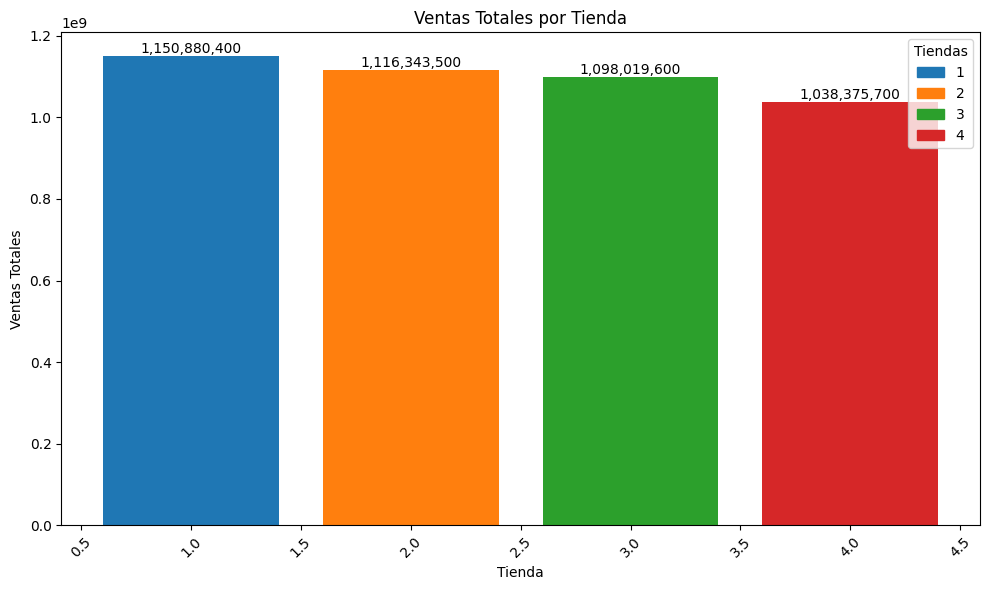

In [52]:
import matplotlib.pyplot as plt

# Suponemos que ya tienes el DataFrame cargado: df_facturacion
tiendas = df_facturacion['Tienda'].tolist()
ventas = df_facturacion['Facturacion Total'].tolist()

# Definir colores para las tiendas (puedes cambiar la paleta)
colores = plt.cm.tab10.colors
color_map = {tienda: colores[i % len(colores)] for i, tienda in enumerate(tiendas)}

# Crear figura
plt.figure(figsize=(10, 6))

# Dibujar barras con color por tienda
colores_barras = [color_map[t] for t in tiendas]
barras = plt.bar(tiendas, ventas, color=colores_barras)

# Agregar valores encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.5, f'{altura:,.0f}',
             ha='center', va='bottom', fontsize=10, color='black')

# Crear leyenda manual con colores por tienda
handles = [plt.Rectangle((0,0),1,1, color=color_map[t]) for t in tiendas]
plt.legend(handles, tiendas, title='Tiendas')

plt.title('Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


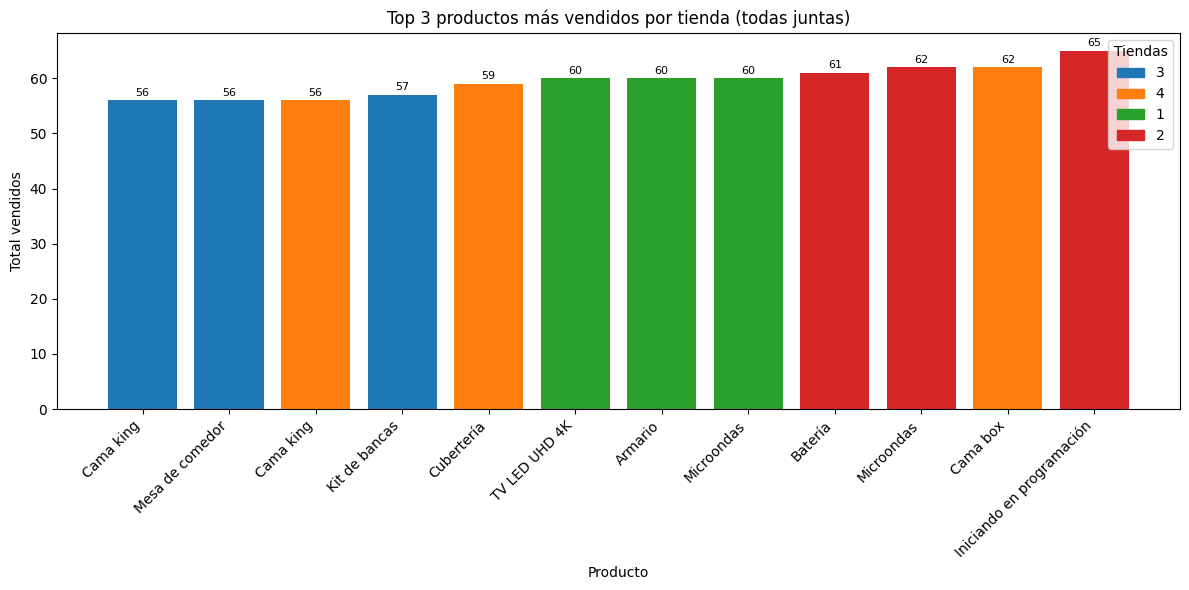

In [43]:
import numpy as np

# Ordenar el dataframe completo de mayor a menor total
df_ordenado = df_mas.sort_values('Total', ascending=True).reset_index(drop=True)

# Preparar posiciones en el eje X
x = np.arange(len(df_ordenado))

# Crear colores para cada tienda
tiendas = df_ordenado['Tienda'].unique()
colores = plt.cm.tab10.colors  # paleta de 10 colores
color_map = {tienda: colores[i % len(colores)] for i, tienda in enumerate(tiendas)}
colores_barras = df_ordenado['Tienda'].map(color_map)

plt.figure(figsize=(12, 6))

# Dibujar barras con color según tienda
barras = plt.bar(x, df_ordenado['Total'], color=colores_barras)

# Poner etiquetas productos (rotadas)
plt.xticks(x, df_ordenado['Producto'], rotation=45, ha='right')

plt.xlabel('Producto')
plt.ylabel('Total vendidos')
plt.title('Top 3 productos más vendidos por tienda (todas juntas)')

# Añadir valores encima de cada barra
for barra, total in zip(barras, df_ordenado['Total']):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.5, str(total),
             ha='center', va='bottom', fontsize=8)

# Crear leyenda manual con colores por tienda
handles = [plt.Rectangle((0,0),1,1, color=color_map[t]) for t in tiendas]
plt.legend(handles, tiendas, title='Tiendas')

plt.tight_layout()
plt.show()


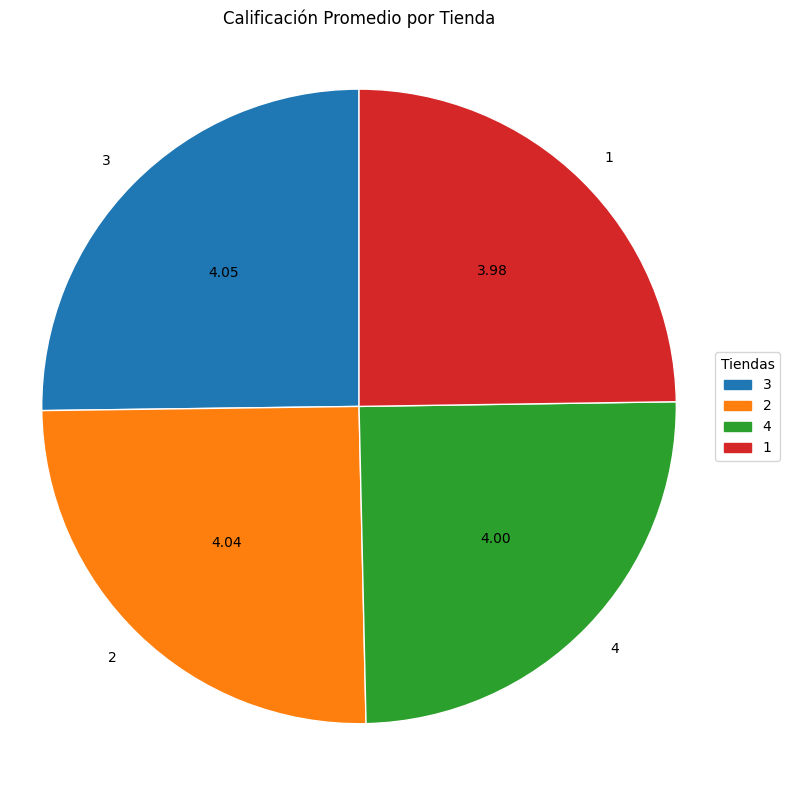

In [55]:
# Supongamos que tienes tiendas y sus colores
tiendas = df_calificacion['Tienda']
calificaciones = df_calificacion['Calificación Promedio']

# Crear un mapa de colores (igual que en barras)
colores_base = plt.cm.tab10.colors
color_map = {tienda: colores_base[i % len(colores_base)] for i, tienda in enumerate(tiendas)}
colores = [color_map[t] for t in tiendas]

plt.figure(figsize=(8,8))

# Función para mostrar el valor en vez de porcentaje
def mostrar_valor(pct, valores):
    total = sum(valores)
    valor = pct * total / 100
    # Como autopct entrega el porcentaje, aquí lo convertimos a valor real
    return f'{valor:.2f}'

# Pie con colores personalizados y valores
wedges, texts, autotexts = plt.pie(
    calificaciones,
    labels=tiendas,
    autopct=lambda pct: f'{(pct/100)*sum(calificaciones):.2f}',
    startangle=90,
    colors=colores,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Calificación Promedio por Tienda')
plt.axis('equal')

# Leyenda manual usando los colores del color_map
handles = [plt.Rectangle((0,0),1,1, color=color_map[t]) for t in tiendas]
plt.legend(handles, tiendas, title='Tiendas', bbox_to_anchor=(1, 0.5), loc='center left')

plt.tight_layout()
plt.show()


# Informe Final

# Informe Final: Recomendación para el Sr. Juan

## Introducción  
Este informe recomienda la tienda más adecuada para vender productos, basado en análisis de ingresos, categorías, satisfacción del cliente, productos vendidos y costos de envío en cuatro tiendas.

## Análisis y Hallazgos

- **Ingresos Totales:**  
  Tienda 1 tiene la facturación más alta, pero la diferencia con las demás no es muy grande.

- **Ventas por Categoría:**  
  Tiendas 3 y 4 destacan en categorías clave como muebles y electrónicos, con buena base de clientes.

- **Calificación Promedio:**  
  Tienda 3 tiene la mejor satisfacción del cliente; Tienda 1 la más baja.

- **Productos Más y Menos Vendidos:**  
  Tienda 2 tiene varios productos top vendidos; Tienda 1 tiene productos menos vendidos y alto costo de envío.

- **Costo de Envío:**  
  Tienda 1 tiene el costo más alto, lo que puede afectar la rentabilidad.

## Conclusión y Recomendación

Se recomienda vender la **Tienda 1** ya que es la menos eficiente.

Aunque factura más, sus costos (especialmente envío) son los más altos y la satisfacción del cliente es la más baja, lo que puede afectar la rentabilidad neta y la sostenibilidad a largo plazo.

Además, tiene productos que no se venden bien, lo que puede generar inventarios o recursos mal invertidos.
